In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#  군집화 실습 : 고객 세그멘테이션

### 고객 세그멘테이션(Customer Segmentation)
- 비즈니스 상품 판매를 위한 고객 분류
- 매출 발생을 위한 고객 선정 기준 결정
- 고객 세그멘테이션의 주요 목표 : **`타깃 마케팅`**
    - 고객을 여러 특성에 맞게 세분화하고, 고객 유형에 따라 맞춤형 마케팅이나 서비스를 제공
    

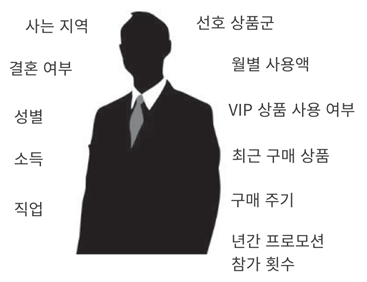

### 고객 세그멘테이션을 위한 고객 군집화 기준
- RFM 기법
    - Recency(R) : 가장 최근 상품 구입 일에서 오늘까지의 기간
    - Frequency(F) : 상품 구매 횟수
    - Monetary Value(M) : 총 구매 금액

## 예제 데이터 : Online Retail Data Set
https://archive.ics.uci.edu/ml/datasets/online+retail

다운로드 받은 데이터파일은 OnlineRetail.xlsx로 변경하여 retail 폴더에 저장

### 데이터 셋 로딩

In [2]:
retail = pd.read_excel('Online Retail.xlsx')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 데이터 탐색

: 데이터세트 전체 건수, 컬럼 타입, 결측치 및 이상치 확인

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**변수**
- InvoiceNo    : 주문번호 'C'로 시작하는 것은 취소 주문      
- StockCode    : 제품 코드(Item Code)
- Description  : 제품 설명        
- Quantity     : 주문 제품 건수         
- InvoiceDate  : 주문 일자
- UnitPrice    : 제품 단가       
- CustomerID   : 고객 번호       
- Country      : 주문고객의국적

In [5]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
retail.shape

(541909, 8)

In [7]:
retail.describe(exclude=['object','datetime'])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


-> quantity, unitprice변수의 최소값이 음수값

### 데이터 정제

In [8]:
df =pd.DataFrame({'name':['Alfred',' Batman','Catwoman'],
                  'toy' : [np.nan, 'Batmobile','Bullwhip'],
                  'born' : [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [9]:
df.dropna(axis=0, subset=['toy','born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [10]:
df.dropna(axis=0)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [11]:
df.fillna({'toy' : 0, 'born' : 10})

,name,toy,born
0,Alfred,0,10
1,Batman,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,10


In [12]:
df['toy'].fillna('noname')

0       noname
1    Batmobile
2     Bullwhip
Name: toy, dtype: object

In [13]:
df['toy'].notnull()

0    False
1     True
2     True
Name: toy, dtype: bool

In [14]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [15]:
df.fillna(method='ffill') #front fill

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,1940-04-25


In [16]:
df.fillna(method='bfill') #back fill

,name,toy,born
0,Alfred,Batmobile,1940-04-25
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [17]:
retail.dropna(subset=['CustomerID']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [18]:
retail.dropna(subset=['CustomerID']).describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [19]:
retail_df = retail.dropna(subset=['CustomerID'])
retail_df = retail_df[retail_df.Quantity > 0]
retail_df = retail_df[retail_df.UnitPrice > 0]
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [20]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [21]:
retail[retail.Quantity <= 0].index

Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,
          939,
       ...
       540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715, 541716,
       541717],
      dtype='int64', length=10624)

In [22]:
retail[retail.UnitPrice <= 0].index

Index([   622,   1970,   1971,   1972,   1987,   1988,   2024,   2025,   2026,
         2406,
       ...
       535333, 535334, 535335, 535336, 536908, 536981, 538504, 538505, 538554,
       538919],
      dtype='int64', length=2517)

In [23]:
retail[(retail.Quantity <=0) & (retail.UnitPrice <=0)].index

Index([  2406,   4347,   7188,   7189,   7190,   7192,   7193,   7195,   7196,
         7197,
       ...
       535327, 535328, 535329, 535330, 535331, 535333, 535335, 535336, 536908,
       538919],
      dtype='int64', length=1336)

In [24]:
temp = np.unique(retail_df.Country, return_counts=True)

In [25]:
temp

(array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
        'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
        'European Community', 'Finland', 'France', 'Germany', 'Greece',
        'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
        'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
        'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
        'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
       dtype=object),
 array([  1182,    398,     17,   2031,     32,    151,    748,    614,
            25,    380,   7236,     60,    685,   8341,   9040,    145,
           182,    248,    758,    321,     45,     35,    112,   2359,
          1071,    330,   1462,     57,      9,    222,   2484,    451,
          1841,    179,     68, 354321,    244]))

In [26]:
country_df = pd.DataFrame(temp[1], index=temp[0], columns=['Count'])
country_df.sort_values('Count',ascending=False)

,Count
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1462
Australia,1182


In [27]:
country_df['ratio'] = np.round(country_df['Count'] / country_df['Count'].sum() * 100, 2)
country_df.head()

,Count,ratio
Australia,1182,0.30
Austria,398,0.10
Bahrain,17,0.00
Belgium,2031,0.51
Brazil,32,0.01


In [28]:
country_df['Percent(%)'] = np.round(country_df['Count'] / country_df['Count'].sum() * 100, 2)

In [29]:
# country_df.drop('ratio', axis=1, inplace=True)
country_df.head()

,Count,ratio,Percent(%)
Australia,1182,0.30,0.30
Austria,398,0.10,0.10
Bahrain,17,0.00,0.00
Belgium,2031,0.51,0.51
Brazil,32,0.01,0.01


In [30]:
retail_df = retail_df[retail_df.Country == 'United Kingdom']

In [31]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [32]:
retail_df.shape

(354321, 8)

## RFM 기반 데이터 가공

**주문금액 변수 sale_amount 추가**

: 'Quantity' * 'UnitPrice'

In [33]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
retail_df['sale_amount'] = (retail['Quantity'] * retail['UnitPrice'])

In [35]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**CustomerID 자료형을 정수형으로 변환**

In [36]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
 8   sale_amount  354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [37]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype('int')
retail_df.CustomerID.dtype

dtype('int64')

**Top5 주문건수와 주문금액을 가진 고객 출력**

In [38]:
retail_df.CustomerID.value_counts()

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
         ... 
16148       1
16073       1
16738       1
15195       1
13747       1
Name: count, Length: 3920, dtype: int64

=> 현재 데이터는 제품거래 중심의 데이터이므로 고객별 데이터로 변환해야 함

- 고객별 총주문금액

In [39]:
# 총 주문금액이 많은 순으로
retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: sale_amount, Length: 3920, dtype: float64

**주문번호(InvoiceNo)+상품코드(StockCode) 기준으로**
: 판매데이터 세트 식별

In [40]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count()

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64

In [41]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

=> 주문번호(InvoiceNo) + 상품코드(StockCode)이 평균빈도가 1에 가까우므로 판매데이터의 식별자로 사용가능

### 고객 기준의 R,F,M 변수를 갖는 데이터 생성

- 주문번호+상품코드 기준의 데이터를 개별 고객 기준의 데이터로 Groupby 수행

**R, F, M 변수 생성**
- Recency : 가장 최근 상품 구입일에서 오늘까지의 기간
    - 'CustomerID'별로 그룹화하여 'Invoice Date' 중 가장 최근 주문일자를 사용
- Frequency : 고객별 주문건수
    - 'CustomerID'별로 그룹화하여 'InvoiceNo' 개수를 계산
- Monetary : 총구매금액
    - 'CustomerID'별로 그룹화하여 'sale_amount'의 합계를 사용

In [42]:
aggs = {'InvoiceDate':'max',
        'InvoiceNo':'count',
        'sale_amount':'sum'}

custom_df = retail_df.groupby('CustomerID').agg(aggs)
custom_df.head()

,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [43]:
# custom_df.columns = ['Recency','Frequncy','Monetary']
custom_df.rename(columns={'InvoiceDate':'Recency',
                          'InvoiceNo':'Frequncy',
                          'sale_amount':'Monetary'}, inplace=True)
custom_df.head()

,Recency,Frequncy,Monetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [44]:
custom_df.reset_index(inplace=True)
custom_df.head()

,CustomerID,Recency,Frequncy,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


In [45]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  3920 non-null   int64         
 1   Recency     3920 non-null   datetime64[ns]
 2   Frequncy    3920 non-null   int64         
 3   Monetary    3920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 122.6 KB


**Recency변수 가공**
- 오늘 날짜를 기준으로 최근 주문 일자를 뺌
- 오늘 날짜 : 2011.12.10
    - 온라인 판매 데이터가 2010.12.01~2011.12.09까지의 데이터

- 2011.12.10에서 최근주문일자를 빼고 일자 데이터(days)만 추출

In [46]:
import datetime as dt

In [47]:
custom_df['Recency'] = dt.datetime(2011,12,10) - custom_df.Recency

In [48]:
custom_df.Recency[2].days + 1

1

In [49]:
custom_df['Recency'] = custom_df['Recency'].apply(lambda x:x.days +1)
custom_df['Recency']

0       326
1         3
2         1
3         4
4         4
       ... 
3915    278
3916    181
3917      8
3918      4
3919     43
Name: Recency, Length: 3920, dtype: int64

In [50]:
custom_df.head()

,CustomerID,Recency,Frequncy,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


## RFM 기반 고객 세그먼테이션

In [51]:
custom_df.columns[1:]

Index(['Recency', 'Frequncy', 'Monetary'], dtype='object')

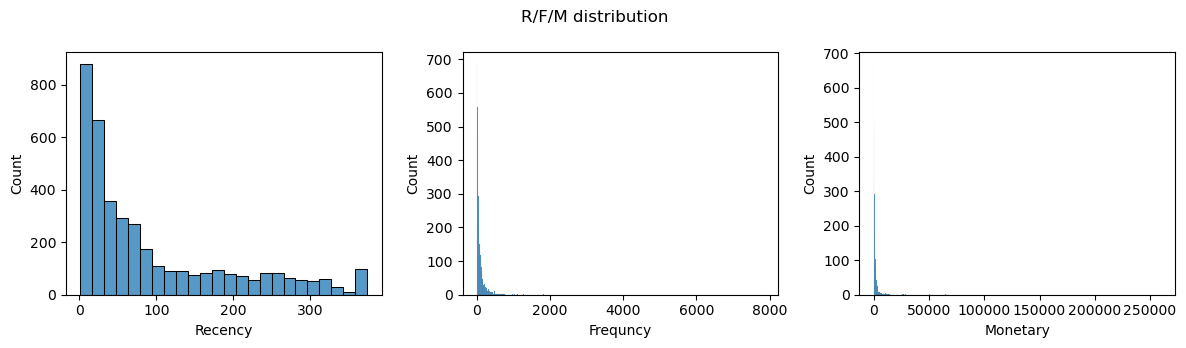

In [52]:
# custom_df.iloc[:,1:].hist()
# plt.show()
rmf = custom_df.columns[1:]
fig, axs = plt.subplots(figsize=(12,3.5), ncols=3)
for i, ftr in enumerate(rmf): 
    sns.histplot(x=custom_df[ftr], ax=axs[i])
plt.suptitle('R/F/M distribution')
plt.tight_layout()
plt.show()

In [53]:
custom_df[rmf].describe()

,Recency,Frequncy,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


#### R,M,F 변수의 표준화

In [54]:
from sklearn.preprocessing import StandardScaler

X = custom_df[rmf].values
X_scaled = StandardScaler().fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=rmf)
X_scaled_df.head()

,Recency,Frequncy,Monetary
0,2.343811,-0.410450,10.066906
1,-0.901742,0.057911,0.311637
2,-0.921838,20.684175,4.257675
3,-0.891694,0.498722,0.297586
4,-0.891694,-0.144127,-0.123237


In [55]:
X_scaled_df.describe()

,Recency,Frequncy,Monetary
count,3.920000e+03,3.920000e+03,3.920000e+03
mean,6.344132e-17,-2.537653e-17,3.443957e-17
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.218385e-01,-4.104498e-01,-2.486861e-01
25%,-7.510199e-01,-3.369814e-01,-2.090530e-01
50%,-4.194309e-01,-2.267787e-01,-1.620059e-01
75%,5.049991e-01,4.069228e-02,-3.846644e-02
max,2.826122e+00,3.561663e+01,3.445571e+01


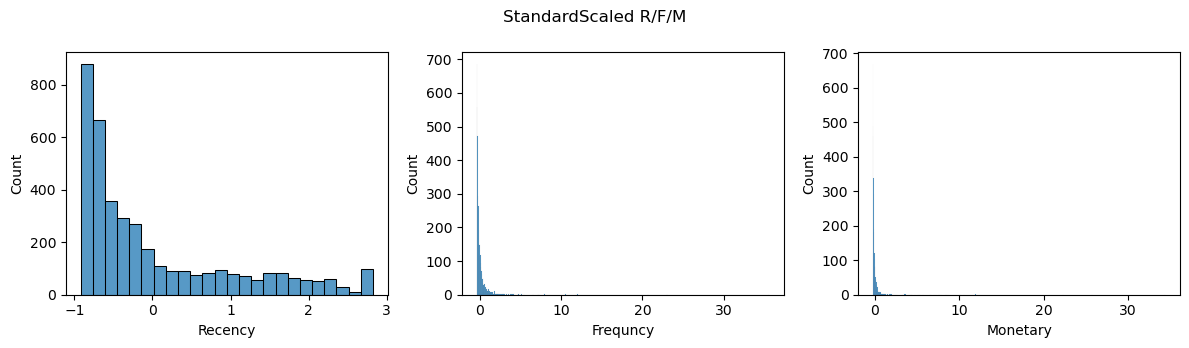

In [56]:
fig, axs = plt.subplots(figsize=(12,3.5), ncols=3)
for i, ftr in enumerate(rmf): 
    sns.histplot(x=X_scaled_df[ftr], ax=axs[i])
plt.suptitle('StandardScaled R/F/M')
plt.tight_layout()
plt.show()

### K-평균 군집분석

In [57]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 
### 각각의 실루엣 계수를 면적으로 시각화한 함수

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서,
    # 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 
    # sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서
    # 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0,
                                   ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color,
                                   alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [58]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 
    # 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서
    # KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)
custom_df['cluster'] = labels
custom_df.head()

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

,CustomerID,Recency,Frequncy,Monetary,cluster
0,12346,326,1,77183.60,0
1,12747,3,103,4196.01,2
2,12748,1,4595,33719.73,2
3,12749,4,199,4090.88,2
4,12820,4,59,942.34,2


In [61]:
silhouette_score(X_scaled, labels)

np.float64(0.5757008325414209)

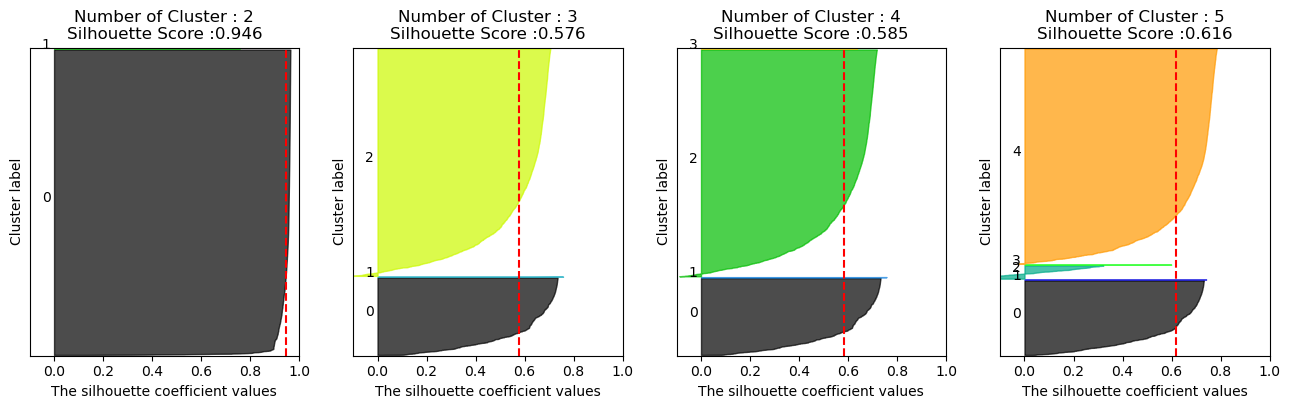

In [62]:
visualize_silhouette([2,3,4,5], X_scaled)

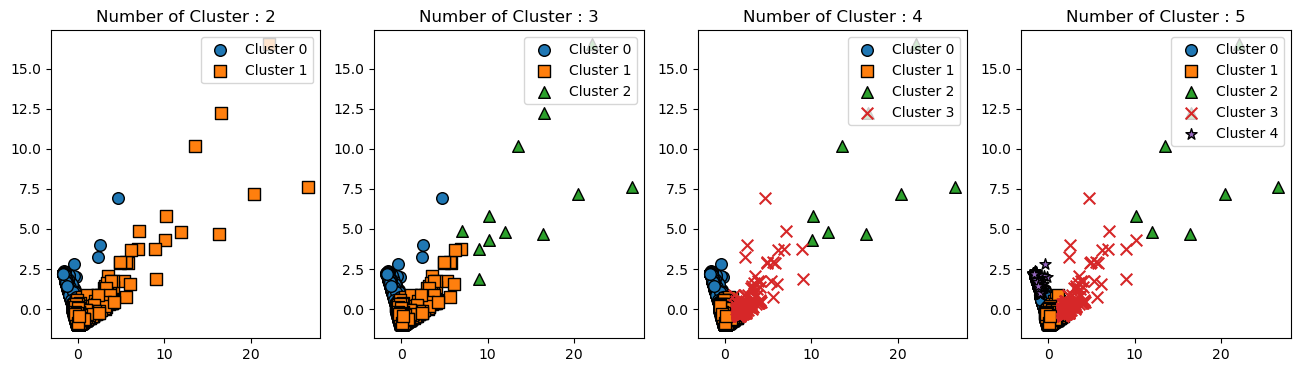

In [63]:
visualize_kmeans_plot_multi([2,3,4,5], X_scaled)

In [64]:
custom_df.columns

Index(['CustomerID', 'Recency', 'Frequncy', 'Monetary', 'cluster'], dtype='object')

### R, M, F 데이터의 로그변환 후 군집분석

R, M, F 변수 모두 왜도가 큰 오른쪽으로 기울어진 분포로 로그변환 필요

In [65]:
# R, F, M 로그변환
# ftrnames = ['Recency_log', 'Frequency_log, 'Monetary_log']
custom_df['Recency_log'] = np.log1p(custom_df.Recency)
custom_df['Frequncy_log'] = np.log1p(custom_df.Frequncy)
custom_df['Monetary_log'] = np.log1p(custom_df.Monetary)

In [66]:
#로그 변환된 데이터에 표준화 적용
X_log = custom_df[['Recency_log','Frequncy_log','Monetary_log']].values
X_log_scaled = StandardScaler().fit_transform(X_log)

In [67]:
X_log_scaled.shape

(3920, 3)

In [68]:
X_log_scaled

array([[ 1.48161832, -2.40338709,  3.78591383],
       [-1.88997639,  0.73257781,  1.44428   ],
       [-2.42067319,  3.73941895,  3.1199826 ],
       ...,
       [-1.26910093, -0.91780272, -1.09247605],
       [-1.71913018,  2.30798143,  0.88585825],
       [-0.05406709,  0.42962703,  0.78039553]])

In [69]:
ftrnames2 = ['Recency_log_scaled','Frequncy_log_scaled','Monetary_log_scaled']
df = pd.DataFrame(X_log_scaled, columns=ftrnames2)
custom_df2 = pd.concat([custom_df, df], axis=1)
custom_df2.head()

,CustomerID,Recency,Frequncy,Monetary,cluster,Recency_log,Frequncy_log,Monetary_log,Recency_log_scaled,Frequncy_log_scaled,Monetary_log_scaled
0,12346,326,1,77183.60,0,5.789960,0.693147,11.253955,1.481618,-2.403387,3.785914
1,12747,3,103,4196.01,2,1.386294,4.644391,8.342128,-1.889976,0.732578,1.444280
2,12748,1,4595,33719.73,2,0.693147,8.432942,10.425868,-2.420673,3.739419,3.119983
3,12749,4,199,4090.88,2,1.609438,5.298317,8.316760,-1.719130,1.251577,1.423880
4,12820,4,59,942.34,2,1.609438,4.094345,6.849427,-1.719130,0.296025,0.243880


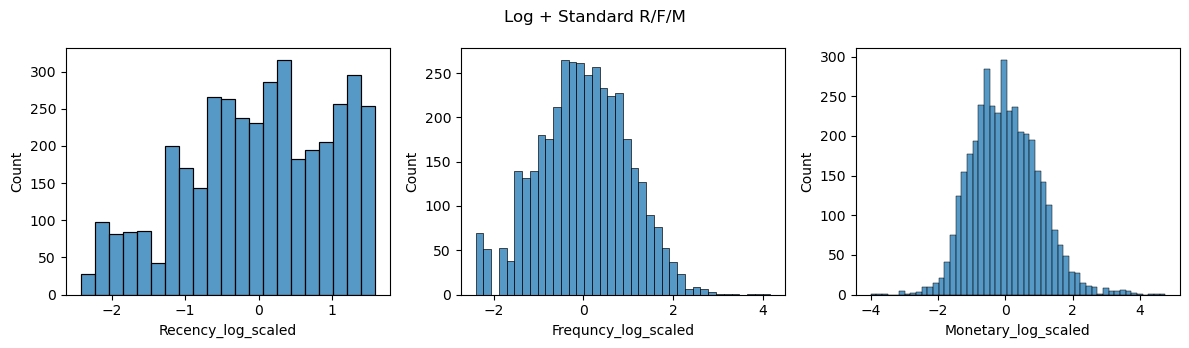

In [70]:
fig, axs = plt.subplots(figsize=(12,3.5), ncols=3)
for i, ftr in enumerate(ftrnames2): 
    sns.histplot(data=custom_df2, x=ftr, ax=axs[i])
plt.suptitle('Log + Standard R/F/M')
plt.tight_layout()
plt.show()

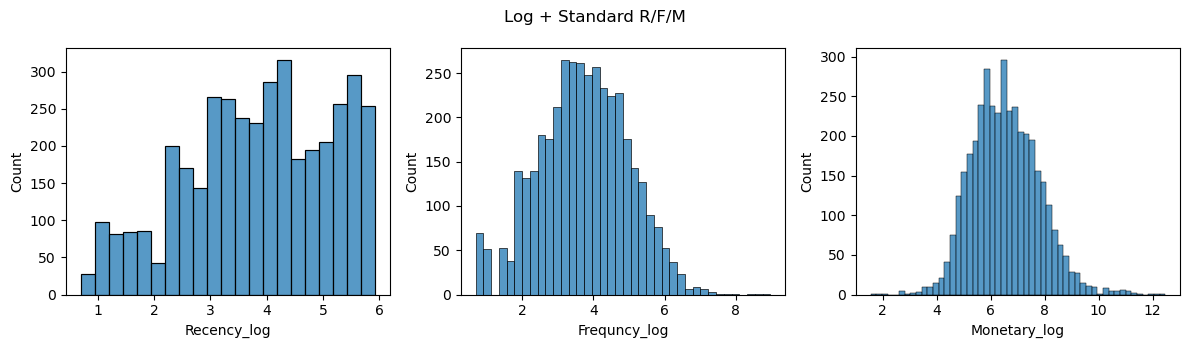

In [71]:
fig, axs = plt.subplots(figsize=(12,3.5), ncols=3)
for i, ftr in enumerate(['Recency_log','Frequncy_log','Monetary_log']): 
    sns.histplot(data=custom_df2, x=ftr, ax=axs[i])
plt.suptitle('Log + Standard R/F/M')
plt.tight_layout()
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_log_scaled)
custom_df['cluster_log'] = labels
silhouette_score(X_log_scaled, labels)

np.float64(0.3028222320093472)

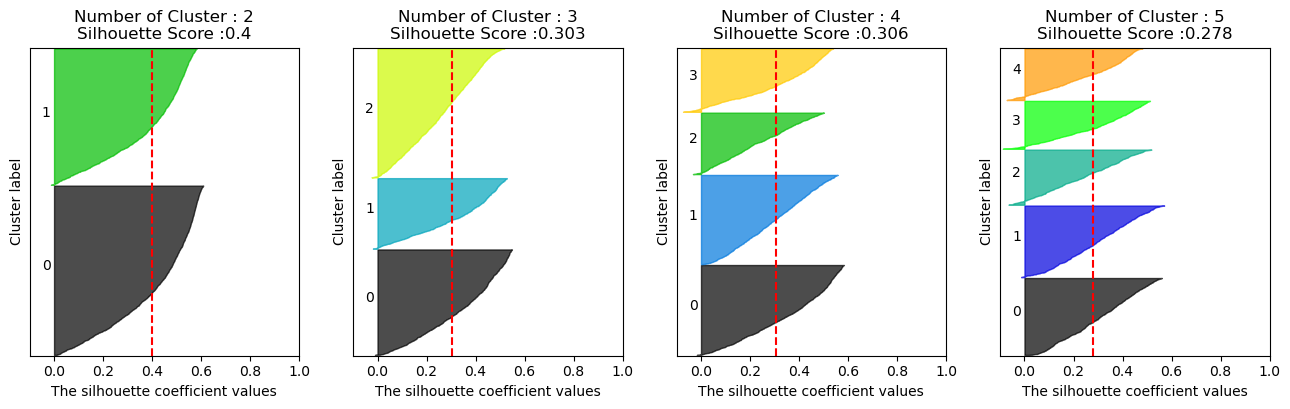

In [73]:
visualize_silhouette([2,3,4,5], X_log_scaled)

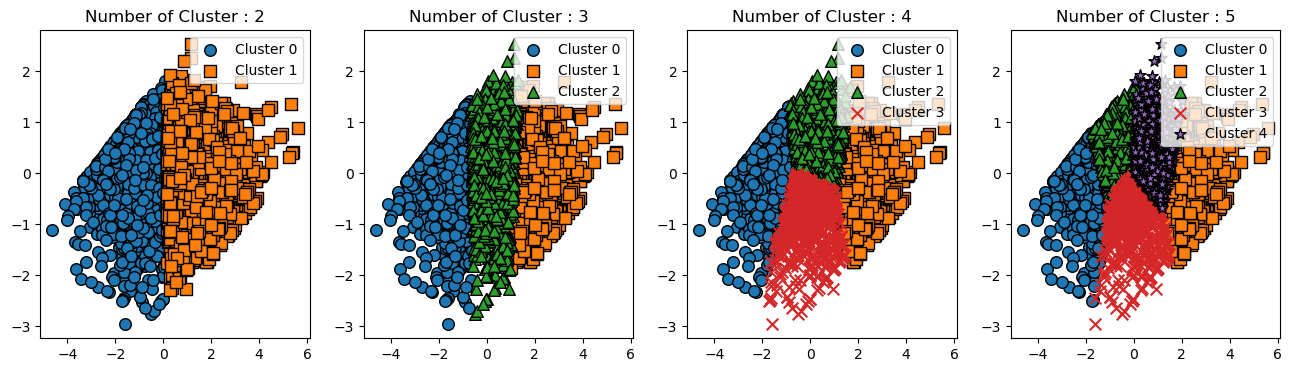

In [74]:
visualize_kmeans_plot_multi([2,3,4,5], X_log_scaled)

=> 비대칭 데이터를 가지고 군집화한 경우보다 로그변환 후 표준화한 데이터를 사용한 경우가 군집화가 균일하게 
잘 이루어짐으로 확인할 수 있음(실루엣 스코어는 떨어지나)


----